In [1]:
import numpy as np
from scipy.integrate import quad

In [83]:
class simulation:
    def __init__(self, k_vec, E0, A_func, A0, omega, t0, t, t_step):
        self.k = np.array(k_vec)
        self.E0 = E0
        self.A = A_func
        self.A0 = A0
        self.omega = omega
        self.t0 = t0
        self.t = t
        self.t_step = t_step
    def fourier_phi(self):
        return 2**(5/2) / np.sqrt(np.pi) * 1/(np.dot(self.k, self.k)+1)**2/np.sqrt(4*np.pi)
    def inner2(self,t_prime):
        return self.k**2/2 * t_prime + self.k * self.A0 / self.omega * np.sin(self.omega*t_prime) + self.A0**2 / 4 * t_prime + self.A0**2/8 / self.omega * np.sin(2*self.omega*t_prime)
    def inner(self, t_prime):
        term1 = np.dot(self.k, self.k) / 2 * t_prime
        term2 = np.dot(self.k, self.A0 * np.sin(self.omega * t_prime) * np.array([1.0, 0.0, 0.0])) / self.omega
        term3 = self.A0**2 / 4 * t_prime
        term4 = self.A0**2 / 8 / self.omega * np.sin(2 * self.omega * t_prime)
        return term1 + term2 + term3 + term4

    def outer(self,t_prime):
        A_val = self.A(t_prime)
        def exp_tot (t_prime):
            return np.exp(1j* self.inner(t_prime)/2 -1j*self.E0 *(t_prime-self.t0))
        return np.dot(self.k, A_val) * exp_tot(t_prime)
    
    def phase_integral(self):
        t_start = self.t0
        t_end = self.t

        def f_tot(t_prime):
            return self.outer(t_prime)
        def f_real (t_prime):
            return np.real( f_tot(t_prime))
        def f_imag (t_prime):
            return np.imag(f_tot(t_prime))
        
        # Integrate real and imaginary parts separately
        real_integral, _ = quad(f_real, t_start, t_end)
        imag_integral, _ = quad(f_imag, t_start, t_end)


        # Combine into complex result
        complex_integral = real_integral + 1j * imag_integral
        return -1j * self.fourier_phi()*complex_integral
    



In [ ]:
class simulation2:
    def __init__(self, k_array, E0, A_func, A0, omega, t0, t, t_step):
        self.k_grid = np.array(k_array)
        self.E0 = E0
        self.A = A_func
        self.A0 = A0
        self.omega = omega
        self.t0 = t0
        self.t = t
        self.t_step = t_step
    def fourier_phi(self,k):
        return 2**(5/2) / np.sqrt(np.pi) * 1/(np.dot(k, k)+1)**2/np.sqrt(4*np.pi)
    def inner2(self,t_prime,k):
        return k**2/2 * t_prime + k * self.A0 / self.omega * np.sin(self.omega*t_prime) + self.A0**2 / 4 * t_prime + self.A0**2/8 / self.omega * np.sin(2*self.omega*t_prime)
    def inner(self, t_prime,k):
        term1 = np.dot(k, k) / 2 * t_prime
        term2 = np.dot(k, self.A0 * np.sin(self.omega * t_prime) * np.array([1.0, 0.0, 0.0])) / self.omega
        term3 = self.A0**2 / 4 * t_prime
        term4 = self.A0**2 / 8 / self.omega * np.sin(2 * self.omega * t_prime)
        return term1 + term2 + term3 + term4

    def outer(self,t_prime,k):
        A_val = self.A(t_prime)
        def exp_tot (t_prime):
            return np.exp(1j* self.inner(t_prime,k)/2 -1j*self.E0 *(t_prime-self.t0))
        return np.dot(k, A_val) * exp_tot(t_prime)
    
    def phase_integral(self,k):
        t_start = self.t0
        t_end = self.t

        def f_tot(t_prime):
            return self.outer(t_prime,k)
        def f_real (t_prime):
            return np.real( f_tot(t_prime))
        def f_imag (t_prime):
            return np.imag(f_tot(t_prime))
        
        # Integrate real and imaginary parts separately
        real_integral, _ = quad(f_real, t_start, t_end)
        imag_integral, _ = quad(f_imag, t_start, t_end)

        # Combine into complex result
        complex_integral = real_integral + 1j * imag_integral

        return -1j * self.fourier_phi(k)*complex_integral
    
    def calc_matrix(self):
        results = []
        for k in self.k_grid:
            res = self.phase_integral(k)
            results.append(np.abs(res)**2)
        results = np.array(results)
        return results.reshape(len(np.unique(self.k_grid[:,0])),
                           len(np.unique(self.k_grid[:,1])),
                           len(np.unique(self.k_grid[:,2])))

    




In [93]:
I = 1e-2/3.51 #au
omega_L = 0.057 #au
A0 = np.sqrt(I)/omega_L
E0 = -0.5 #au
eps = 0
def A(t):
    return A0/np.sqrt(1+eps**2) * np.sin(omega_L * t) * np.array([ 0.0,np.sin(omega_L * t)*eps, np.cos(omega_L * t)])

k_x = np.linspace(-5, 5, 30)  # 11 Werte von -5 bis 5
k_y = np.linspace(-5, 5, 30)
k_z = np.linspace(-5, 5, 30)

# Erzeuge das Gitter
X,Y,Z = np.meshgrid(k_x, k_y,k_z)
k_grid = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=-1)


In [94]:

sim2 = simulation2(k_grid,E0,A,A0,omega_L,1,2,100)
sim2.calc_matrix()

array([[[3.30857495e-11, 5.59289183e-11, 6.68918326e-11, ...,
         6.68918326e-11, 5.59289183e-11, 3.30857495e-11],
        [6.03360777e-11, 7.86421398e-11, 7.51840043e-11, ...,
         7.51840043e-11, 7.86421398e-11, 6.03360777e-11],
        [8.70027370e-11, 9.11168790e-11, 6.94671869e-11, ...,
         6.94671869e-11, 9.11168790e-11, 8.70027370e-11],
        ...,
        [1.73762321e-11, 7.33861588e-12, 1.36101943e-11, ...,
         1.36101943e-11, 7.33861588e-12, 1.73762321e-11],
        [3.03036567e-11, 1.70072273e-11, 7.12226955e-12, ...,
         7.12226955e-12, 1.70072273e-11, 3.03036567e-11],
        [3.20622924e-11, 2.82176984e-11, 1.77344613e-11, ...,
         1.77344613e-11, 2.82176984e-11, 3.20622924e-11]],

       [[6.45215642e-11, 7.92006728e-11, 7.14280115e-11, ...,
         7.14280115e-11, 7.92006728e-11, 6.45215642e-11],
        [9.07243341e-11, 8.74314901e-11, 6.05923947e-11, ...,
         6.05923947e-11, 8.74314901e-11, 9.07243341e-11],
        [1.05115631e-10, 

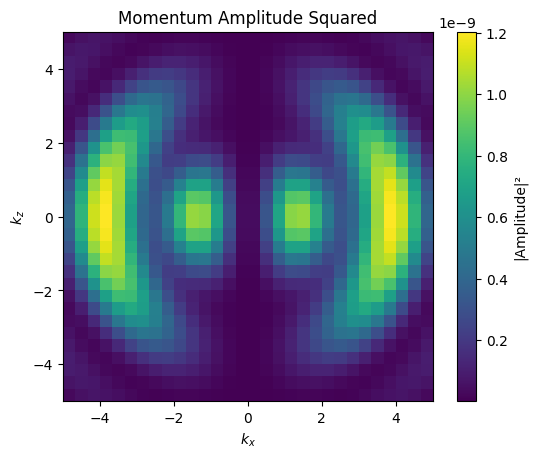

In [96]:
import matplotlib.pyplot as plt

# Assuming `matrix` is your result from `calc_matrix()`
matrix = sim2.calc_matrix()

# Slice at k_z = 0 (only one slice in this case)
plt.imshow(matrix[:, 0, :], extent=(k_x[0], k_x[-1], k_z[0], k_z[-1]), origin='lower', cmap='viridis')
plt.colorbar(label='|Amplitude|²')
plt.xlabel('$k_x$')
plt.ylabel('$k_z$')
plt.title('Momentum Amplitude Squared')
plt.show()


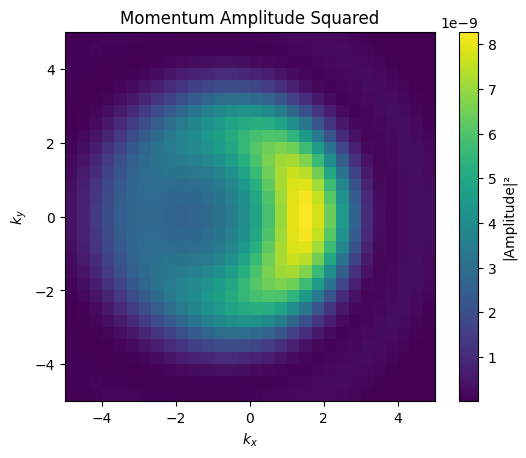

In [97]:
import matplotlib.pyplot as plt

# Assuming `matrix` is your result from `calc_matrix()`
matrix = sim2.calc_matrix()

# Slice at k_z = 0 (only one slice in this case)
plt.imshow(matrix[:, :, 0], extent=(k_x[0], k_x[-1], k_y[0], k_y[-1]), origin='lower', cmap='viridis')
plt.colorbar(label='|Amplitude|²')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Momentum Amplitude Squared')
plt.show()
